#### EJERCICIO 15

El fichero star.txt contiene la temperatura y la intensidad de la luz en un conjunto de estrellas. 
Calcula y representa la recta de mínimos cuadrados para explicar la temperatura en función de la 
intensidad de la luz.

Se importan las librerías necesarias:

In [10]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt


Se convierte el txt en csv:

In [2]:
# Definir la ruta de los archivos
ruta_txt = 'C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\star.txt'
ruta_csv = 'C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\star.csv'


# Abrir el archivo de texto y crear el archivo CSV 
with open(ruta_txt, 'r+') as txtfile1, \
     open(ruta_csv, 'w', newline='') as csvfile1, \
     open('temp.txt', 'w') as temp_file:
    # Leer el archivo de texto línea por línea y escribir en el archivo CSV
    for line in txtfile1:
        # Reemplazar "," con "."
        contenido_actualizado1 = line.replace(",", ".")
        # Dividir los valores en cada línea en una lista
        row1 = contenido_actualizado1.strip().split()
        # Crear un objeto csv writer y escribir la lista en el archivo CSV
        writer = csv.writer(csvfile1)
        writer.writerow(row1)
        # Escribir la línea actualizada en el archivo temporal
        temp_file.write(contenido_actualizado1)

# Reemplazar el contenido del archivo de texto original con el del archivo temporal
os.replace('temp.txt', ruta_txt)

Se calcula la media de la temperatura y la intensidad de la luz:

In [4]:
df = pd.read_csv(ruta_csv)
x_mean = df['Intens'].mean()
y_mean = df['Temp'].mean()

Se calcula la covarianza y la varianza de la intensidad de la luz y la temperatura:

In [5]:
cov_xy = ((df['Intens'] - x_mean) * (df['Temp'] - y_mean)).sum()
var_x = ((df['Intens'] - x_mean) ** 2).sum()

Se calcula el coeficiente de regresión y la ordenada al origen:

In [9]:
beta = cov_xy / var_x
alpha = y_mean - beta * x_mean

Se representa la recta de regresión en un gráfico de dispersión:

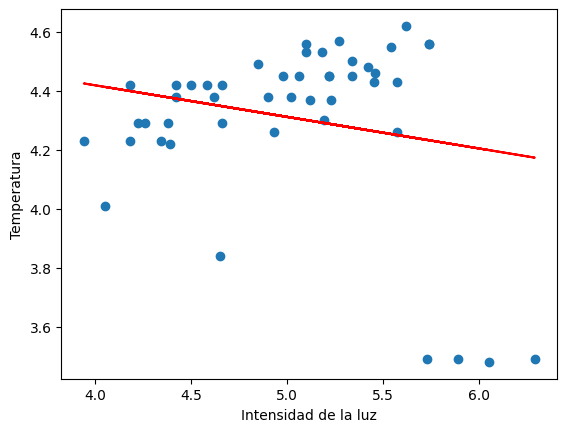

In [8]:
plt.scatter(df['Intens'], df['Temp'])
plt.plot(df['Intens'], alpha + beta * df['Intens'], color='red')
plt.xlabel('Intensidad de la luz')
plt.ylabel('Temperatura')
plt.show()